In [1]:
import sys
sys.path.append('..')

import utils, selex_dca, indep_sites
import adabmDCA
import selex_distribution, energy_models, tree, data_loading, training, callback, sampling

import torch
from utils import one_hot
import matplotlib.pyplot as plt
from tqdm.autonotebook import tqdm

/Users/scrotti/Aptamer2025py/selex_dca.py:7: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
dtype = torch.float32

In [6]:
L, q = 45, 4
M = 10**4

h = torch.randn(L, q, dtype=dtype)
J = utils.rand_coupling_matrix(L, q, dtype=dtype)
potts = energy_models.Potts(J, h)
self = potts.train(mode=False)

x_ = torch.randint(q, (M,L))
x = one_hot(x_)

with torch.no_grad():
    x_flat = x.view(-1, L * q)
    bias_flat = self.h.view(L * q)
    couplings_flat = (self.J * self.mask).reshape(L * q, L * q)
    bias_term = x_flat @ bias_flat
    coupling_term = torch.sum(x_flat * (x_flat @ couplings_flat), dim=1)

In [7]:
bias_term.std(), coupling_term.std()

(tensor(6.1095), tensor(6.1793))

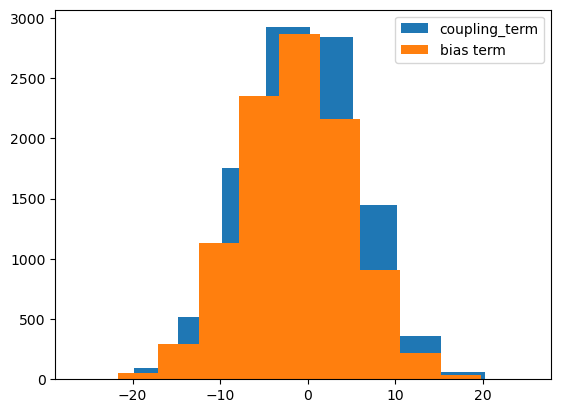

In [8]:
plt.hist(coupling_term, label='coupling_term')
plt.hist(bias_term, label='bias term')
plt.legend()